In [9]:

# importing librarires
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
sns.set_style('whitegrid')
import matplotlib.pyplot as plt 

# Dataset 1: Precio medio por metro cuadrado de toda España.

Extraido de idealista.com por Adrian 

Coste 5€

In [10]:
df_pm = pd.read_csv("Historico_precios.csv",sep="\t")

df_pm = df_pm.drop(['Variación mensual','Variación trimestral','Variación anual'],axis=1)

df_pm.head()

,Mes,Precio m2
0,Diciembre 2022,1.921 €/m2
1,Noviembre 2022,1.929 €/m2
2,Octubre 2022,1.910 €/m2
3,Septiembre 2022,1.893 €/m2
4,Agosto 2022,1.896 €/m2


In [11]:
df_pm.shape

(204, 2)

brew tap homebrew/core
brew install homebrew/core/libomp
pip install lightgbm --install-option="--openmp-include-dir=/path/to/libomp/include" 
pip install lightgbm --install-option="--openmp-include-dir=/path/to/libomp/include" 
ln -s /path/to/libomp/lib/libomp.dylib /usr/local/opt/libomp/lib/libomp.dylib


# Dataset 2: Histórico del IPC

Extraido desde https://www.ine.es/consul/serie.do?d=true&s=IPC251852&c=2&

In [12]:
df_ipc = pd.read_csv("series324445766c.csv")

df_ipc = df_ipc.drop(['PERIODO','TIPO DATO','NOTA'],axis=1)

df_ipc.head()

,VALOR
2022M12,899
2022M11,734
2022M10,866
2022M09,498
2022M08,265


# Objetivo: Crear un modelo de Regresión Lineal para precedir el precio medio en base al IPC


Tarea 1: Arreglar los datos

In [13]:
diccionario_meses = {
    '01':'Enero',
    '02':'Febrero',
    '03':'Marzo',
    '04':'Abril',
    '05':'Mayo',
    '06':'Junio',
    '07':'Julio',
    '08':'Agosto',
    '09':'Septiembre',
    '10':'Octubre',
    '11':'Noviembre',
    '12':'Diciembre'    
}

In [14]:
df_ipc = df_ipc.reset_index().rename({'index':'Fecha'},axis=1) #renombrar columna   

In [15]:
fecha_ejemplo = '2022M11' # Noviembre 2022

In [16]:
fecha_ejemplo.split("M") # M es el separador    

['2022', '11']

* ***The transforma_fechas() function*** takes in a date string as input and outputs a reformatted version of that date string. Its purpose is to transform a date that is in a numeric month/year format into a more readable string with the month spelled out.

* It takes a single input parameter called fecha, which is expected to be a string containing the month as a numeric value followed by the 4-digit year. For example "32020" for March 2020.

1. first splits the input string on the "M" character to separate the numeric month and year into two variables called mes_numerico and anio.

2. looks up the string name of the month using a dictionary called diccionario_meses that maps numeric months to their spelled out names.

3. The spelled out month name and year are concatenated together with a space in between to create the final output string fecha_n.

So in summary, this function takes a numeric date string as input, converts the numeric month to its name, and returns a more readable date string with the month spelled out. It uses string splitting, dictionary lookups, and concatenation to transform the input into a different string output.



 

In [17]:
# Transforms a date in MM/YYYY format to Month YYYY format


def transforma_fechas(fecha):

    fecha_n = None 

    anio = fecha.split("M")[0] 
    mes_numerico = fecha.split("M")[1]
    anio,mes_numerico = fecha.split("M")[0],fecha.split("M")[1]

    mes_string = diccionario_meses[mes_numerico]
    fecha_n = mes_string+" "+anio
    return fecha_n

In [18]:
df_ipc['Mes'] = df_ipc.Fecha.apply(transforma_fechas)

# Applies the function to the Fecha column of df_ipc 
# to extract just the month into a new Mes column


In [19]:
df_ipc.drop('Fecha',axis=1,inplace=True)# Drops the 'Fecha' column from the df_ipc DataFrame in place.


In [20]:
df_ipc

,VALOR,Mes
0,899,Diciembre 2022
1,734,Noviembre 2022
2,866,Octubre 2022
3,498,Septiembre 2022
4,265,Agosto 2022
...,...,...
247,374,Mayo 2002
248,118,Abril 2002
249,165,Marzo 2002
250,590,Febrero 2002


Tarea 2: Juntar los dataframes

In [21]:
df = pd.merge(df_ipc,df_pm,on='Mes',how='inner')# Merges df_ipc and df_pm DataFrames on 'Mes' column 
# using inner join, storing result in df


In [22]:
df

,VALOR,Mes,Precio m2
0,899,Diciembre 2022,1.921 €/m2
1,734,Noviembre 2022,1.929 €/m2
2,866,Octubre 2022,1.910 €/m2
3,498,Septiembre 2022,1.893 €/m2
4,265,Agosto 2022,1.896 €/m2
...,...,...,...
199,251,Mayo 2006,1.937 €/m2
200,959,Abril 2006,1.934 €/m2
201,833,Marzo 2006,1.951 €/m2
202,272,Febrero 2006,1.972 €/m2


Tarea 3: Arreglar las columnas para que sean numéricas 

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204 entries, 0 to 203
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   VALOR      204 non-null    int64 
 1   Mes        204 non-null    object
 2   Precio m2  204 non-null    object
dtypes: int64(1), object(2)
memory usage: 6.4+ KB


In [24]:
# Solucion Adrian
df['Precio m2'].str.replace(" €/m2","")# Replaces " €/m2" with empty string in the 'Precio m2' column of df dataframe. 
# Removes the "€/m2" text from the price per square meter values.


# Solución Irene con ayuda de Carlos
df['Precio m2'].apply(lambda x: x.split(" ")[0])# Applies a lambda function to the 'Precio m2' column of df 
# that splits each value on whitespace and takes the first element.
# This removes the "€/m2" text from the price per square meter values.

df['Precio m2'].str.split(' ').apply(lambda x: x[0])# Splits the 'Precio m2' column on whitespace and applies a lambda function 
# that takes the first element of the split list. This removes the "€/m2" text,
# leaving just the numeric price per square meter value.


# Escoge la que más te guste :)

0      1.921
1      1.929
2      1.910
3      1.893
4      1.896
       ...  
199    1.937
200    1.934
201    1.951
202    1.972
203    1.975
Name: Precio m2, Length: 204, dtype: object

In [25]:
df['Precio m2'] = df['Precio m2'].str.replace(" €/m2","")

'''Replace the euro symbol and m2 text in the 'Precio m2' 
column values, converting them to numeric values'''


"Replace the euro symbol and m2 text in the 'Precio m2' \ncolumn values, converting them to numeric values"

In [26]:
df['Precio m2'] = df['Precio m2'].str.replace(".","").astype(float)# Converts the 'Precio m2' column values from strings to floats 
# by removing the '.' character and casting to float


/var/folders/m8/hp9mxxbj6dv9x3px18fy22_r0000gn/T/ipykernel_26845/1562383982.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Precio m2'] = df['Precio m2'].str.replace(".","").astype(float)# Converts the 'Precio m2' column values from strings to floats


In [27]:
df.head()

,VALOR,Mes,Precio m2
0,899,Diciembre 2022,1921.0
1,734,Noviembre 2022,1929.0
2,866,Octubre 2022,1910.0
3,498,Septiembre 2022,1893.0
4,265,Agosto 2022,1896.0


Paso 4: E D A 

In [28]:
df.rename({'VALOR':'IPC'},axis=1,inplace=True)# Renames the 'VALOR' column to 'IPC'


In [29]:
df.describe()

,IPC,Precio m2
count,204.000000,204.000000
mean,481.009804,1772.803922
std,288.168824,171.460779
min,1.000000,1496.000000
25%,229.000000,1606.750000
50%,478.000000,1781.500000
75%,734.500000,1927.500000
max,999.000000,2053.000000


In [30]:
df['año'] = df.Mes.apply(lambda x: x.split(" ")[1])

# Extracts the year from the Mes column by splitting on whitespace and taking the second element


In [31]:
df[df.año=="2022"]# Returns a DataFrame filtered to only rows where the 'año' column equals 2022


,IPC,Mes,Precio m2,año
0,899,Diciembre 2022,1921.0,2022
1,734,Noviembre 2022,1929.0,2022
2,866,Octubre 2022,1910.0,2022
3,498,Septiembre 2022,1893.0,2022
4,265,Agosto 2022,1896.0,2022
5,986,Julio 2022,1888.0,2022
6,267,Junio 2022,1876.0,2022
7,262,Mayo 2022,1869.0,2022
8,375,Abril 2022,1853.0,2022
9,566,Marzo 2022,1825.0,2022


In [32]:
df_2022 = df[df.año=="2022"]

In [33]:
df_2022

,IPC,Mes,Precio m2,año
0,899,Diciembre 2022,1921.0,2022
1,734,Noviembre 2022,1929.0,2022
2,866,Octubre 2022,1910.0,2022
3,498,Septiembre 2022,1893.0,2022
4,265,Agosto 2022,1896.0,2022
5,986,Julio 2022,1888.0,2022
6,267,Junio 2022,1876.0,2022
7,262,Mayo 2022,1869.0,2022
8,375,Abril 2022,1853.0,2022
9,566,Marzo 2022,1825.0,2022


In [34]:
df_2022.describe()

,IPC,Precio m2
count,12.000000,12.000000
mean,557.333333,1874.833333
std,260.193052,38.769326
min,262.000000,1814.000000
25%,348.000000,1846.000000
50%,532.000000,1882.000000
75%,767.000000,1899.500000
max,986.000000,1929.000000


In [35]:
import matplotlib.pyplot as plt

In [60]:
# df_2022.corr()

# Returns a correlation matrix of the DataFrame showing the correlation coefficients between each pair of columns.

df_2022.corr(method='spearman')


/var/folders/m8/hp9mxxbj6dv9x3px18fy22_r0000gn/T/ipykernel_26845/1767233101.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_2022.corr(method='spearman')


,IPC,Precio m2,precio_escalado
IPC,1.000000,0.370629,0.370629
Precio m2,0.370629,1.000000,1.000000
precio_escalado,0.370629,1.000000,1.000000


<AxesSubplot: >

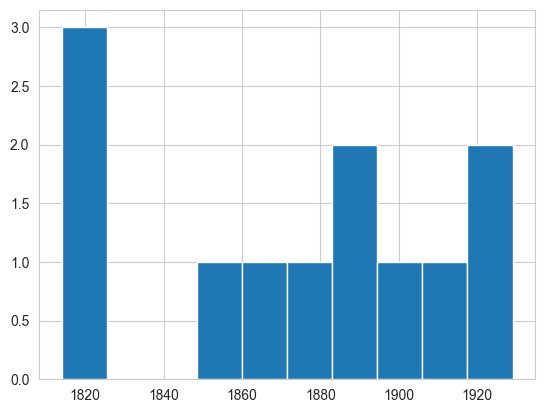

In [61]:
df_2022['Precio m2'].hist()

In [38]:
df_2022['Precio m2'].count() 

12

Normalizamos el target

In [62]:
from sklearn.preprocessing import StandardScaler

In [63]:
scaler = StandardScaler()

scaler.fit(df_2022['Precio m2'].values.reshape(-1,1))

df_2022['precio_escalado'] = scaler.transform(df_2022['Precio m2'].values.reshape(-1,1))

/var/folders/m8/hp9mxxbj6dv9x3px18fy22_r0000gn/T/ipykernel_26845/3807717616.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022['precio_escalado'] = scaler.transform(df_2022['Precio m2'].values.reshape(-1,1))


<AxesSubplot: >

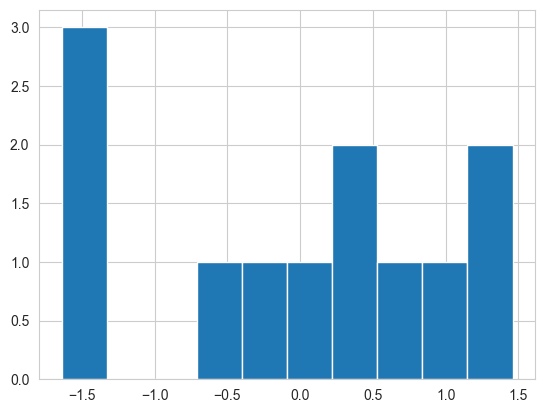

In [64]:
df_2022['precio_escalado'].hist()



***Distribution shape:***
 * The distribution appears relatively normal/***bell-shaped***, though ***slightly right-skewed***. This suggests ***most values are centered around the mean***, with fewer high outliers.

* ***Central tendency:*** The distribution is centered around the ***mean of about 4.5***. This gives us a sense of the "average" home price.

* ***Spread:*** The ***prices seem to range from around 2.5 to 6.5***, with only a few outliers above or below. This gives us a sense of how dispersed the prices are.

* ***Outliers***: There are a few potential outliers with very low (below 2.5) or very high (above 6.5) values. These could be valid rare values or could need further investigation for data errors.

***Modality:*** The distribution appears ***unimodal - there is only one peak.*** This suggests there are not distinct subgroups of prices.

***Bin size:*** The bins could be made smaller to see more detailed distribution shape.

***Skewness:*** The distribution appears ***slightly right-skewed***. This suggests that there are more values above the mean.

***Gaps in the distribution.Around -1.0*** it could indicate:

* ***Missing data*** - There are no or very few data points that have that value (-1.0), so it shows up as a gap. This could be due to data collection issues or filtering of the data.

* ***Data processing artifact*** - Sometimes gaps can be introduced when binning continuous data into histograms. ***The specific bin edges chosen can create visual gaps where there aren't necessarily missing values.***

* ***Natural gap in the data*** - It may just be that for some reason, there are no or very few homes with that particular price after scaling. So it reflects an actual gap in the underlying data.

* To investigate, the raw, unbinned data to see if there are indeed no or very few values around -1.0. I would also try changing the bin sizes / edges to see if the gap persists or is a visual artifact.

* If it's a real gap, further analysis could help uncover why - ***is it driven by market conditions, data issues, or other factors?*** The gap is an interesting feature to note as it deviates from the otherwise relatively smooth distribution. Follow up analysis and checking the raw data can shed more light on the reason for it.

***So in summary, the histogram shows us the prices are relatively normally distributed, centered around the mean, with a few high outliers but otherwise fairly continuous within a defined range. We'd need to inspect the data further to understand the causes and validity of the outliers.***






In [42]:
df_2022['Precio m2'].mean()# Returns the mean price per square meter for the 2022 data


1874.8333333333333

In [43]:
round(df_2022['precio_escalado'].mean())# Returns the mean of the 'precio_escalado' column in df_2022, rounded to the nearest integer.


0

In [44]:
df_2022['Precio m2'].std()# Returns the standard deviation of the 'Precio m2' column in df_2022


38.76932558170965

std() the standard deviation of the scaled price column in df_2022, rounded to the nearest integer.

* The standard deviation measures the amount of variation or dispersion from the average.


* ***A low standard deviation indicates that the data points tend to be close to the mean, while a high standard deviation indicates that the data points are spread out over a wider range of values.***


In [65]:
round(df_2022['precio_escalado'].std())
# Returns the standard deviation of the scaled prices in the 2022 dataframe, rounded to the nearest integer.


1

***The standard deviation of a data set is a measure of how spread out or dispersed the data is from the mean.*** 

* A low standard deviation indicates that the data points tend to be close to the mean, while a high standard deviation indicates that the data points are more spread out from the mean.

***A standard deviation of 1 meaning:***

* It indicates that the data points are spread out from the mean by about 1 unit on average.

* For a normal distribution, about 68% of the data points will lie within +/- 1 standard deviation of the mean.

* So a standard deviation of 1 indicates a relatively tight, narrow distribution of data around the mean.

* It suggests there is not a lot of variability or dispersion in the data.

* The data points are clustered fairly close to the mean value.

***So in summary, a standard deviation of 1 indicates the data distribution is relatively narrow, with most values close to the mean and little dispersion. It suggests a high degree of consistency in the data set. A low standard deviation like this is considered desirable in many cases.***

In [67]:
from scipy.stats import shapiro

In [47]:
shapiro(df_2022['precio_escalado'])

# Tests the normality of a data column using the Shapiro-Wilk test.
# Returns the test statistic and p-value.


ShapiroResult(statistic=0.9384642243385315, pvalue=0.4784366190433502)

***p-value of 0.478*** from the Shapiro-Wilk test for normality, we can conclude that:

* ***The data does not allow us to reject the null hypothesis that the data is normally distributed***. ***Typically a p-value below 0.05 is used as the threshold for rejecting normality***.

* Since the p-value is greater than 0.05, we fail to reject the null hypothesis and ***can assume the data is approximately normally distributed***.

*  This suggests that using methods and models which assume normality (like linear regression) may be appropriate for this data.

***However, with a p-value close to 0.05, we cannot strongly conclude normality.*** Further visual inspection of the data may be prudent to check the distribution.

So in summary, the relatively high Shapiro-Wilk p-value suggests the data could be treated as roughly normal, but does not definitively prove normality. We can proceed with using models suited for normal data, but should verify with visualizations. we need to check the test statistic 





In [48]:
shapiro(df_2022['Precio m2'])

# Tests the normality of a data column using the Shapiro-Wilk test.
# Returns the test statistic and p-value.


ShapiroResult(statistic=0.9384642243385315, pvalue=0.4784366190433502)

* The Shapiro-Wilk test statistic measures ***how closely the data matches a normal distribution***.  test statistic value of 0.9384:

* The statistic can ***range from 0 to 1, with 1 indicating perfect normality***. A value of 0.9384 is reasonably close to 1.

* ***Values above 0.90 are generally considered to show reasonable normality***. So 0.9384 suggests potential normality.

* However, ***values below 0.95*** start to raise some questions about departures from normality.

* With a statistic below 0.95, we can't conclusively say the data is perfectly normal based on this test alone.

* In summary:

* A Shapiro-Wilk statistic of 0.9384 indicates ***potential normality but not definitively.***

* It is in the ambiguous range between 0.90 and 0.95 where normality is suggested but not confirmed.

* The p-value and visual inspection of data should be used together with the statistic to fully assess normality.

* The statistic alone is not enough evidence to prove the data is perfectly normal. Further checks would be prudent.

* So in practice, a statistic of 0.9384 means normality is possible but not certain based on this Shapiro-Wilk test.

 ***The p-value and visualization should supplement the statistic.*** for the following reasons:

 1. ***The p-value lacks context without knowing the effect size measured by the statistic***. A small p-value could correspond to a trivial deviation.

2. ***The statistic lacks thresholding for significance without the p-value***. It does not directly say if the deviation is statistically significant.

3. Together they provide more insight:
***The statistic gives the size of the effect. The p-value thresholds whether that effect is significant***.

4. The p-value gains meaning with the context of the statistic's magnitude.







In [49]:
import matplotlib.pyplot as plt

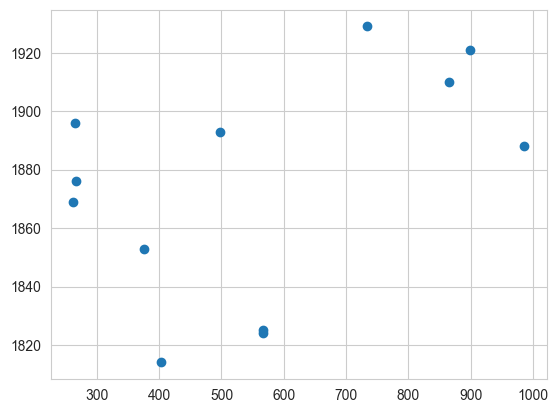

In [50]:
plt.scatter(df_2022['IPC'],df_2022['Precio m2'])

# Plots a scatter plot of IPC vs Price per square meter using the 2022 dataframe 


***Scatter plot of 'IPC' (x-axis) vs 'Precio m2' (y-axis) :***

* There appears to be a positive correlation between IPC and Precio m2. ***As IPC increases, Precio m2 also tends to increase***. This suggests inflation (as measured by IPC) and housing prices per square meter are positively related.

* The relationship appears relatively linear. The points scatter roughly around a straight line going from bottom left to top right. So there ***appears to be a linear relationship between the variables***.

* There is some variability in Precio m2 at each level of IPC. ***For a given IPC, there is a range of Precio m2 values***. ***So IPC alone does not completely determine housing prices***. There are likely other factors involved.

* The strength of the correlation appears moderate to strong. ***The points are not perfectly aligned, but there is a clear positive trend***. So ***inflation*** seems to have a ***notable, but not absolute, relationship with housing prices***.

* There may be ***outliers*** in the data. Some points are further from the main cluster, which could represent ***anomalous or outlier data points***. Additional investigation of these could be warranted.

* The nature of the ***connection between IPC and Precio m2 is still unclear***. This scatter plot ***shows correlation but not causation***. More analysis would be needed to determine the causal relationship, if any.

***So in summary, the main conclusion is that there appears to be a moderately strong positive correlation between inflation and the housing prices per square meter in this data set. But the scatter plot alone cannot determine a definitive causal relationship.***





In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
model = LinearRegression()

In [53]:

model.fit(df_2022['IPC'].values.reshape(-1,1),
# Fits the linear regression model on the IPC and Price per m2 columns from the 2022 dataframe. 
# The .values converts the Series to numpy arrays and .reshape reshapes them to (-1, 1) for single input.
# This allows the model to be fit on the two input columns.
df_2022['Precio m2'].values.reshape(-1,1))

LinearRegression()

In [54]:
''' The intercept_ attribute of a linear regression model 
contains the intercept of the model. The intercept is
the expected value of the target variable when all 
predictor variables are 0.
'''

model.intercept_



array([1838.60602055])

*** The intercept represents the expected value of the response (y) when the predictor (x) is 0.***

* An intercept of 1838.60602055 indicates that when the predictor variable is 0, the model predicts the response to be 1838.60602055.

* This suggests that even if the predictor is absent, there is still a baseline value of the response variable that is greater than 0.

* ***A positive intercept indicates there are likely other variables and factors***, besides the predictor in the model, that influence the response variable.

* The model predicts the response to start at 1838.60602055 when the predictor is 0, and then increase or decrease from there as the predictor changes.

* The magnitude of the intercept (1838.60602055) is quite large relative to the data, which suggests the model may be missing key predictor variables that explain the baseline value of the response.

* There may be inherent factors uncaptured in the model that lead to a high baseline predicted value for the response variable.

* Overall, the large positive intercept indicates the model is likely missing key variables that account for the response, leading to a high predicted baseline value even when the included predictor variable is 0.

* The large positive intercept suggests the model is incomplete and lacks important predictor variables that explain the full range of variation in the response variable. Additional predictors likely need to be added to better model the data.



***

In [55]:
'''The model coefficients (model.coef_) 
show the estimated coefficients 
for each feature in the linear regression model.
 This can be used to 
understand the relationship between 
features and the target variable.'''


model.coef_



array([[0.06500116]])

***The coefficient represents the slope of the regression line, or the change in the response (y) for a 1 unit change in the predictor (x).***

* A coefficient of 0.06500116 suggests a relatively small, positive relationship between the predictor and response.

* Specifically, it indicates that ***for a 1 unit increase in the predictor, the response variable increases by 0.06500116 units.***

* The small, ***positive coefficient*** suggests the predictor has a ***real but weak effect on the response variable.***
***
* ***This could mean the predictor is not the main driver of changes in the response***, and there are likely other important variables not included in the model.

* A coefficient close to 0 indicates the predictor does not have a strong linear relationship with the response variable.

* The small coefficient relative to the large intercept of 1838 suggests the included predictor has ***low explanatory power for the response variable.***

* The model may need additional meaningful predictors to establish a stronger relationship with the response variable.

***In summary, the small positive coefficient indicates a weak positive linear relationship between the predictor and response, suggesting the model is incomplete and needs other important predictor variables added.***

So in general, the very small coefficient relative to the large intercept indicates the current model lacks explanatory power and needs improvement. Additional predictors are likely needed to strengthen the relationship.





In [68]:
# Predict IPC values for 2022 using the trained model
pred = model.predict(df_2022['IPC'].values.reshape(-1,1))




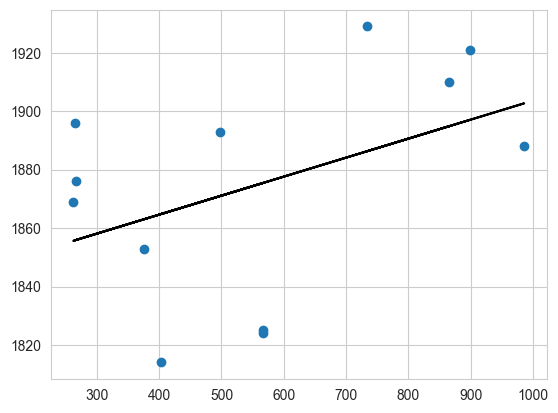

In [69]:
plt.scatter(df_2022['IPC'],df_2022['Precio m2'])
plt.plot(df_2022['IPC'],pred,color='k')

* The model's predicted values follow the general positive trend of the actual data. ***This suggests the model is capturing the overall positive relationship between IPC and Precio m2.***

* However, the predicted values appear to under-estimate the actual Precio m2 values, particularly at higher values of IPC. ***The model's predictions run below the main cluster of points***.

* ***This indicates the current model is likely underestimating the true effect of IPC on Precio m2***. There are likely other factors not captured in the model that contribute to the Precio m2.

* ***The spread of the actual data points around the prediction line highlights the variability in Precio m2 that is not explained by the model***. There remains a lot of unexplained variance.

* The model's predictions are likely too low and do not capture the full range of actual Precio m2 values, especially at higher IPC levels.

Additional predictor variables are likely needed to improve model accuracy and more fully capture the relationship between IPC and Precio m2.

Overall, ***the model shows a basic positive trend but lacks the nuance and flexibility to make accurate predictions across the full range of data***. Refining the model could improve its predictive capabilities.

* In summary, the model captures the general positive trend but underestimates the actual Precio m2, indicating its predictions are likely too low across most of the IPC range due to missing variables. Model refinement is needed to improve accuracy.

In [58]:
from sklearn.metrics import r2_score

In [59]:
# Calculates the R^2 (coefficient of determination) regression score between the actual prices per square meter in df_2022['Precio m2'] and the predicted prices per square meter in pred.
r2_score(df_2022['Precio m2'],pred)


0.19030802510035283

* ***The R-squared indicates the proportion of variance in the response variable (df_2022['Precio m2']) that is explained by the predictor variables in the model.***

* An R-squared of 0.1903 is considered a relatively low value. It suggests ***the model can only account for about 19% of the variance in the response variable.***

* ***This means most of the variability in Precio m2 (about 81%) is unexplained by the current model.*** There are likely important variables missing from the model.

* The low R-squared indicates the model lacks predictive power and does not fit the data very well overall. Its predictions will be far from accurate.

* With an R-squared this low, the model is not capturing most of the relationship between the predictors and the response variable.

* Additional meaningful predictors need to be identified and added to the model to increase the R-squared and improve its fit to the data.

***Key factors that influence Precio m2 are not being modeled properly with the current predictors***. The model needs major improvements.

* In summary, ***the very low R-squared of 0.1903 indicates poor model fit and predictive capability***. The model is missing key explanatory variables for the response and needs significant improvement to boost accuracy.

***So in general, an R-squared of 0.1903 implies the current regression model is inadequate and lacking in its ability to predict Precio m2 from the predictors. The model needs major refinements to improve fit.***



